In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import math
from scipy.stats import weibull_min
import random

In [2]:
step_size=0.05
REVERSALS=3

In [3]:
responses_df = pd.read_csv("Data/Locations_mask.csv")
for i in range(len(responses_df)):
    try:
        responses_df.at[i,"Nearest_prev_group_loc"] = [int(x) for x in (responses_df.iloc[i]["Nearest_prev_group_loc"].split(","))]
    except:
        pass

responses_df.insert(5,"Contrast_list",value=[[] for i in range(len(responses_df))])
responses_df.insert(6,"Responses",value=[[] for i in range(len(responses_df))])
responses_df.insert(7,"Reversals",value=[0]*len(responses_df))
responses_df.insert(8,"Estimated_contrast_level",value=[1.0]*len(responses_df))
responses_df.insert(9,"Weibull Threshold",value=[0.0]*len(responses_df))
responses_df.insert(10,"Weibull Slope",value=[0.0]*len(responses_df))

responses_df.head()

,Location,X,Y,Group,Nearest_prev_group_loc,Contrast_list,Responses,Reversals,Estimated_contrast_level,Weibull Threshold,Weibull Slope
0,0,2,7,3,"[4, 5, 6]",[],[],0,1.0,0.0,0.0
1,1,3,7,3,"[5, 6, 7]",[],[],0,1.0,0.0,0.0
2,2,4,7,3,"[6, 7, 8]",[],[],0,1.0,0.0,0.0
3,3,5,7,3,"[7, 8, 9]",[],[],0,1.0,0.0,0.0
4,4,1,6,2,[12],[],[],0,1.0,0.0,0.0


In [4]:
def get_random_location(groupnumber):
    x = list(responses_df.loc[(responses_df["Group"]==groupnumber) & (responses_df["Reversals"]==0)].index)
    random.shuffle(x)
    return x

In [5]:
def get_nearest_ones_value(location):#CHECK WITH CHRIS
    """
    Find the nearest 1s for the given location and obtain the contrast level to start
    """
    
    prev_group_location = responses_df.iloc[location]["Nearest_prev_group_loc"]

    try:
        contrast_value = responses_df.iloc[prev_group_location[0]]["Contrast_list"][-1]
    except:
        contrast_value = 1
        
    return contrast_value

def get_nearest_neighbours_value(location):#####CHECK WITH CHRIS
    """
    Find the nearest neighbours for the given location and obtain the AVERAGE contrast level to start
    """
    prev_group_location = responses_df.iloc[location]["Nearest_prev_group_loc"]
    
    try:
        contrast_list = []
        for i in range(len(prev_group_location)):
            last_contrast_level = responses_df.iloc[prev_group_location[i]]["Contrast_list"][-1]
            contrast_list.append(last_contrast_level)
            
        avg_contrast_value = sum(contrast_list)/len(contrast_list)
        
    except:
        print("Exception raise: location:",location)
        avg_contrast_value=1
        
    return avg_contrast_value

In [6]:
def perform_simulated_responses(groupnumber):
    """
    Given a group number it will perform the staircase method and collect responses until 3 reversals are recorded
    """
    
    random_location_list = get_random_location(groupnumber)
    print(random_location_list)
    for location in random_location_list:

        #if group number is 1 then contrast elvel starts with 1.0
        if(groupnumber==1):
            contrast_list=[1.0]

        #else start with the average estimate of the nearests previous group
        if(groupnumber==2):
            contrast_value = get_nearest_ones_value(location)
            contrast_list = [contrast_value]

        if(groupnumber==3 or groupnumber == 4):
            contrast_value = get_nearest_neighbours_value(location)
            contrast_list = [contrast_value]

        responses=[]
        while(responses_df.iloc[location]["Reversals"]<REVERSALS):

            output = np.random.choice([True,False])

            #print(output)

            if(output==True):
                responses.append("Yes")
                if(len(responses)>=2 and responses[-1]!=responses[-2]):
                    responses_df.at[location,"Reversals"] = responses_df.iloc[location]["Reversals"]+1
                
                #if(contrast_list[-1]<0.2): #CHECK WITH CHRIS
                #    contrast_list.append(0.05)
                #else:
                contrast_list.append(contrast_list[-1]-step_size/(responses_df.iloc[location]["Reversals"]+1))
                    

            elif(output==False):
                responses.append("No")
                if(len(responses)>=2 and responses[-1]!=responses[-2]):
                    responses_df.at[location,"Reversals"] = responses_df.iloc[location]["Reversals"]+1
                contrast_list.append(contrast_list[-1]+step_size/(responses_df.iloc[location]["Reversals"]+1))


        if(len(responses)!=len(contrast_list)):
            contrast_list=contrast_list[:-1]

        contrast_list = [round(elem, 2) for elem in contrast_list ]    
        responses_df.at[location,"Contrast_list"] = contrast_list
        responses_df.at[location,"Responses"] = responses

In [7]:
def simulation_method():
    #sample a random location
    #put random response
    #based on response do staircase procedure
    
    #start with group 1
    perform_simulated_responses(groupnumber=1)
    
    #group2
    perform_simulated_responses(groupnumber=2)
    
    #group3
    perform_simulated_responses(groupnumber=3)
    
    #group4
    perform_simulated_responses(groupnumber=4)
    

In [8]:
simulation_method()

[36, 39, 12, 15]
[27, 35, 23, 30, 6, 42, 5, 43, 14, 11, 47, 8, 22, 19, 28, 4, 31, 20, 21, 38, 45, 9, 29, 16, 46, 40, 44, 7, 37, 13]
[26, 18, 2, 51, 50, 49, 48, 10, 0, 24, 17, 41, 1, 3, 32, 34]
[33, 25]


In [9]:
def plot_observations_loc(location):
    
    print("location:",location)
    
    observed_levels = responses_df.iloc[location]["Contrast_list"] # y axis

    plt.plot(range(len(observed_levels)),observed_levels,marker="D")
    # naming the x axis
    plt.xlabel('Trial number')
    # naming the y axis
    plt.ylabel('Contrast levels')
    plt.show()

location: 0


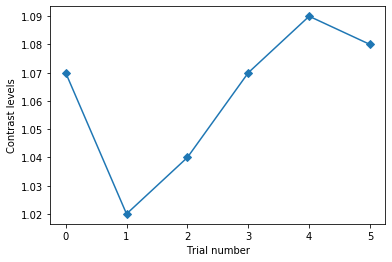

location: 1


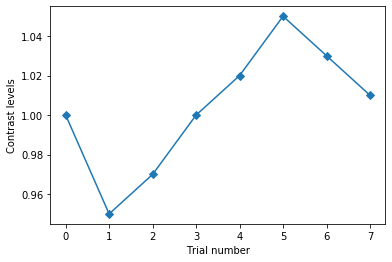

location: 2


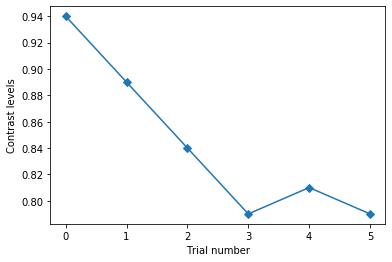

location: 3


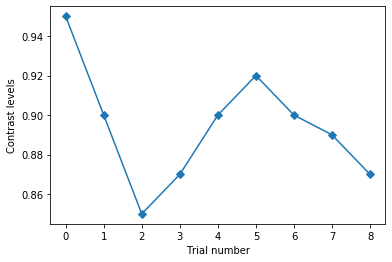

location: 4


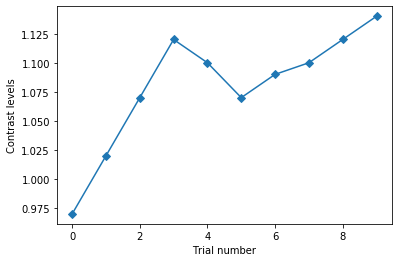

location: 5


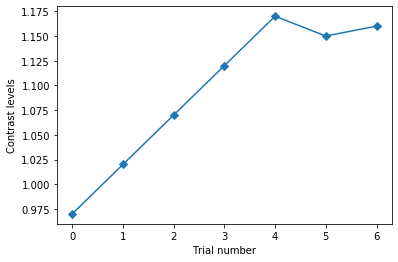

location: 6


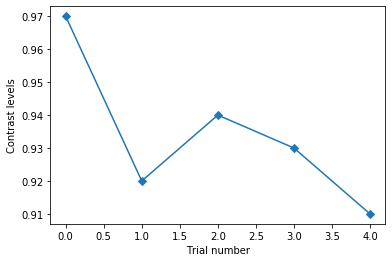

location: 7


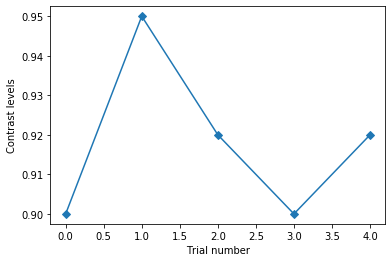

location: 8


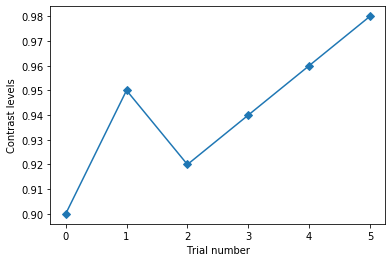

location: 9


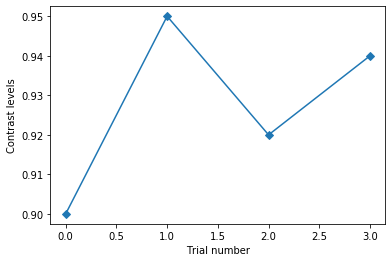

location: 10


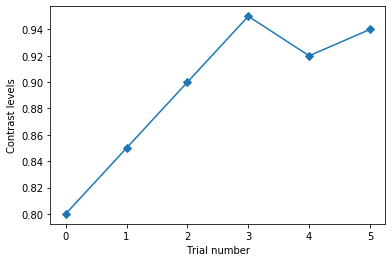

location: 11


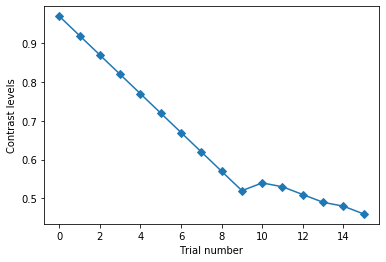

location: 12


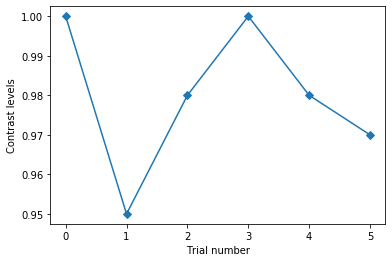

location: 13


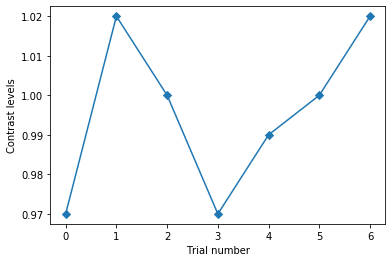

location: 14


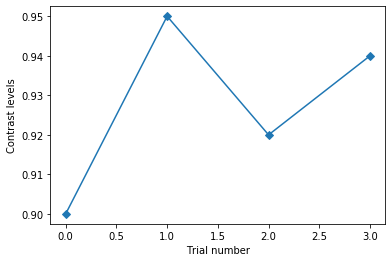

location: 15


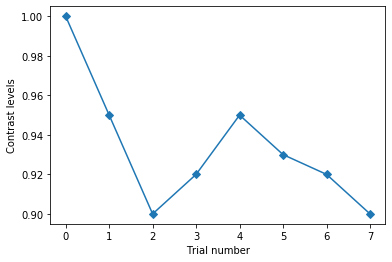

location: 16


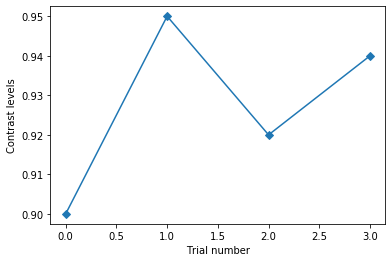

location: 17


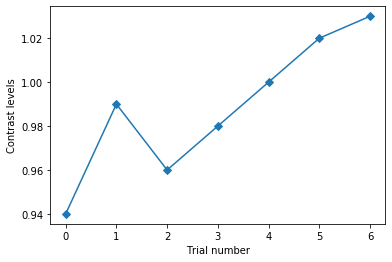

location: 18


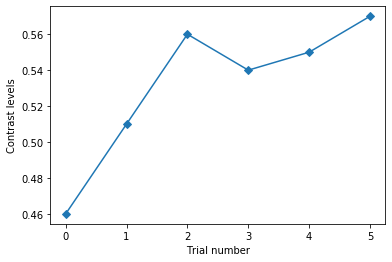

location: 19


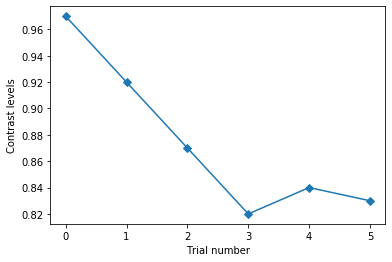

location: 20


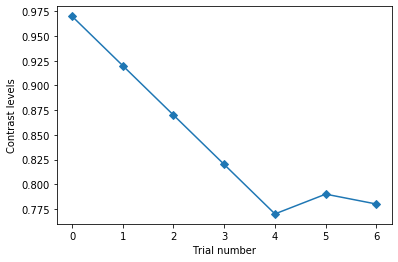

location: 21


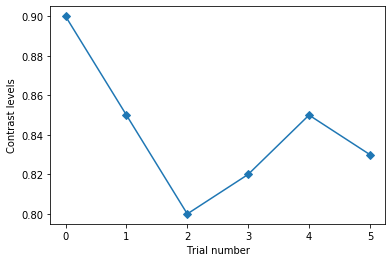

location: 22


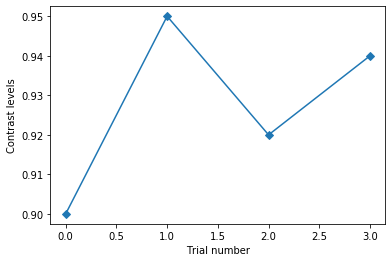

location: 23


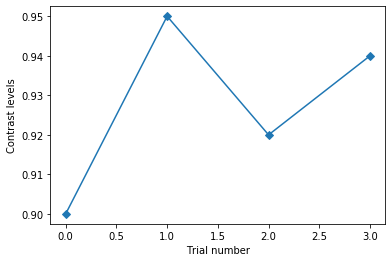

location: 24


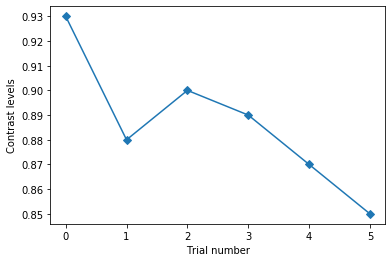

location: 25


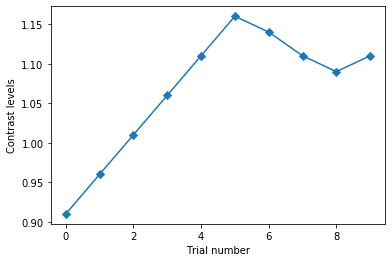

location: 26


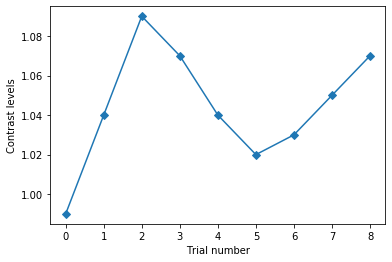

location: 27


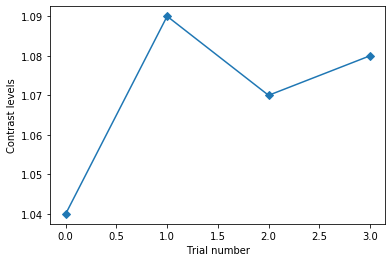

location: 28


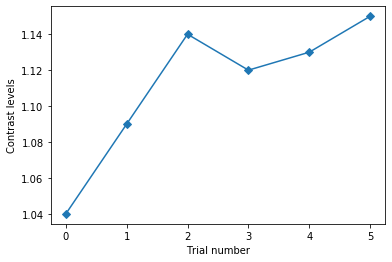

location: 29


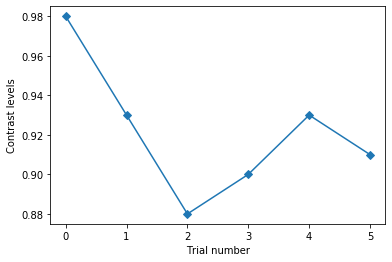

location: 30


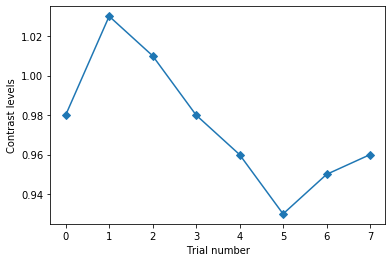

location: 31


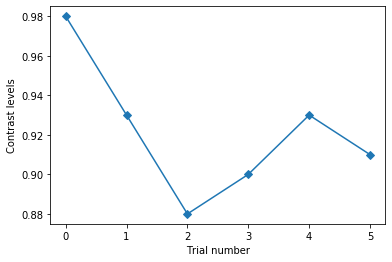

location: 32


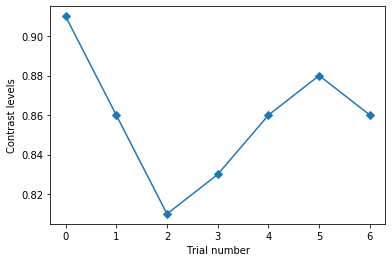

location: 33


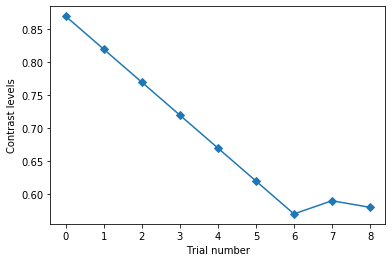

location: 34


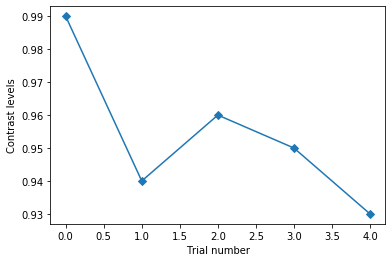

location: 35


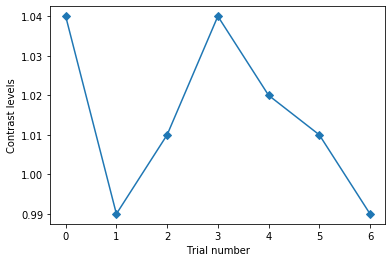

location: 36


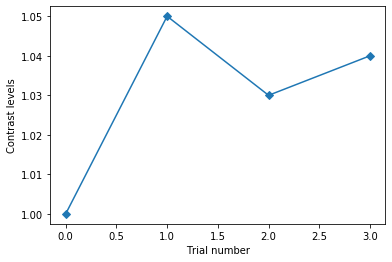

location: 37


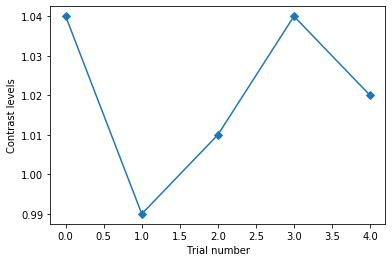

location: 38


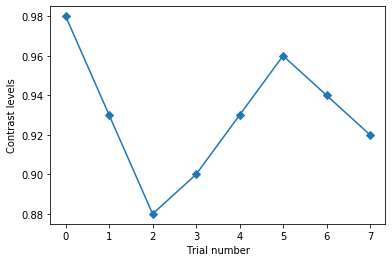

location: 39


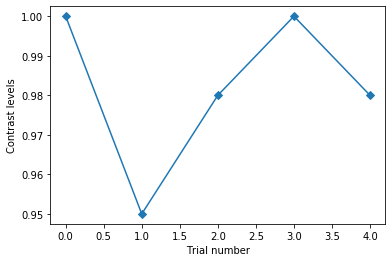

location: 40


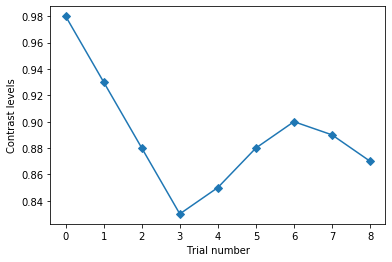

location: 41


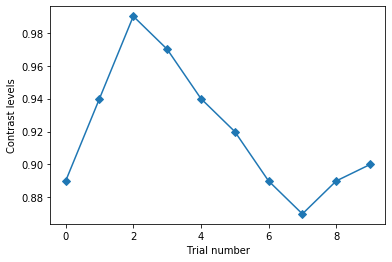

location: 42


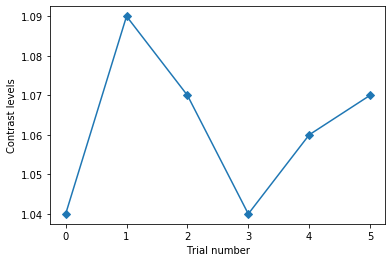

location: 43


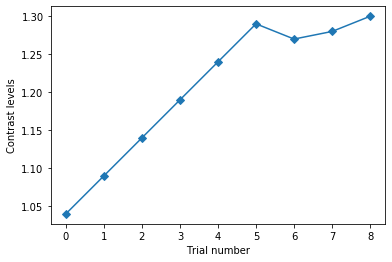

location: 44


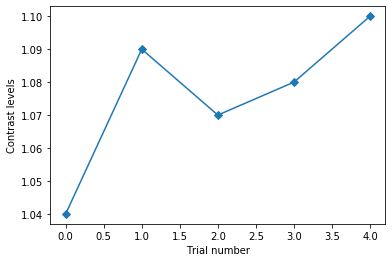

location: 45


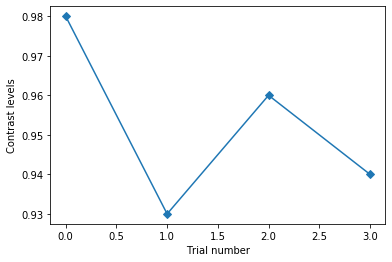

location: 46


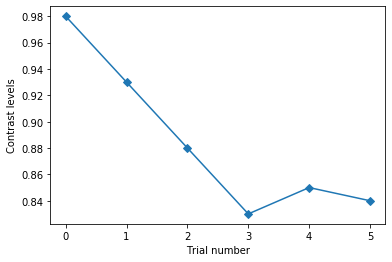

location: 47


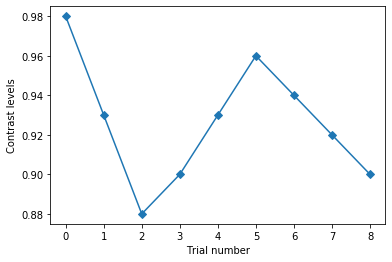

location: 48


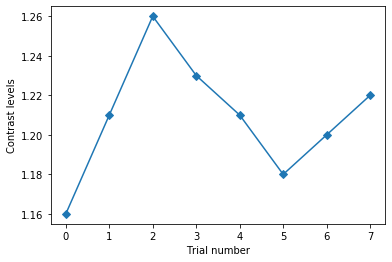

location: 49


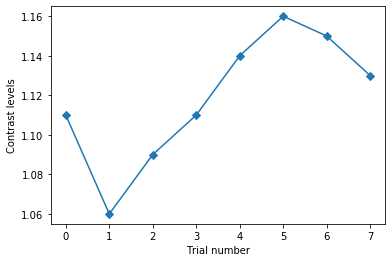

location: 50


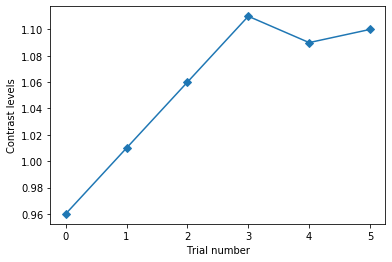

location: 51


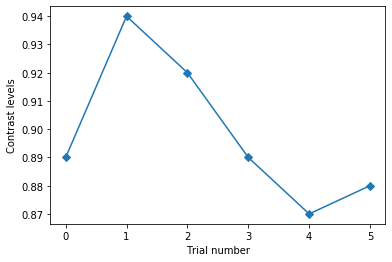

In [10]:
for i in range(len(responses_df)):
    plot_observations_loc(i)

- Staircase procedure just estimates the threshold of the contrast but does not help in estimating the slope of a pyschometric function
- We fit our data on a weibull distribution using a "maximum likelihood" procedure to pick levels that predict the correct performance

#### Weibull distribution
y = 1 - e^(x/lambda)^k

where 
    x = stimulus intensity
    y = percentage of correct responses
    lambda and k are free parameters which we estimate
    
#refer http://courses.washington.edu/matlab1/Lesson_5.html

our formula:
out = g + (1 - g).*(1 - exp(-(x./lambda).^k));


##### parameter search: 
 - scale parameter: lambda(-3:0,0.0001)
 - shape parameter: k0(2:2.5,0.1)
<br>These are taken from previous matlab code

In [11]:
# reimplemented from matlab
# g=0
# required for fractional stepsize

def drange(start, stop, step):
    r = start
    while r < stop:
        yield r
        r += step

def weibull(x,k,l,g):
    # k = slope
    # l = threshold
    return g + (1 - g)*(1 - math.exp(-(x/l)**k))

def own_fitweibull(g=0):
    #location g = 0

    i0 = drange(-3,0,0.001)
    lmbda = [float(x) for x in i0]          #Scale parameter

    i1 = drange(2,2.5,0.1)
    k0 = [float(x) for x in i1]                  #Shape parameter or slope

    g=0

    for i in range(len(responses_df)):
        LL0 = float('-inf') 
        optLambda = float('-inf')
        mleK = float('-inf')

        contrast_list = responses_df.iloc[i]["Contrast_list"]
        responses = responses_df.iloc[i]["Responses"]

        df = pd.DataFrame(list(zip(contrast_list,responses)),columns=["Contrast","Response"])

        #convert responses to
        correct_responses = list(df.loc[df.Response=="Yes"].Contrast)
        incorrect_responses = list(df.loc[df.Response=="No"].Contrast)

        for cc in range(len(lmbda)):
            for ss in range(len(k0)):
                # log likelihood
                CR = []
                IR = []
                for response in correct_responses:
                    w_result = weibull(10**math.log10(response), k0[ss], 10**lmbda[cc], g);    # Correct responses
                    w_result = math.log(w_result)
                    #print(response,w_result)
                    CR.append(w_result)

                for response in incorrect_responses:
                    w_result = weibull(10**math.log10(response), k0[ss], 10**lmbda[cc], g);    # Incorrect responses
                    #print(w_result)
                    w_result = 1.01 - w_result          #see matlab implementation 1.01 because log0 is not defined
                    w_result = math.log(w_result)       #see matlab implementation
                    IR.append(w_result)

                LL = sum(CR) + sum(IR);                 #likelihood estimate

                if(LL>LL0):
                    optLambda = lmbda[cc]
                    mleK = k0[ss]
                    LL0 = LL
                    #print(LL0)

        # keep the most optimal values for threshold and slope in the matrix
        threshold = 10**optLambda
        slope = mleK
        responses_df.at[i,"Weibull Threshold"] = threshold
        responses_df.at[i,"Weibull Slope"] = slope
    

In [12]:
own_fitweibull()

In [13]:
responses_df

,Location,X,Y,Group,Nearest_prev_group_loc,Contrast_list,Responses,Reversals,Estimated_contrast_level,Weibull Threshold,Weibull Slope
0,0,2,7,3,"[4, 5, 6]","[1.07, 1.02, 1.04, 1.07, 1.09, 1.08]","[Yes, No, No, No, Yes, No]",3,1.0,1.000000,2.0
1,1,3,7,3,"[5, 6, 7]","[1.0, 0.95, 0.97, 1.0, 1.02, 1.05, 1.03, 1.01]","[Yes, No, No, No, No, Yes, Yes, No]",3,1.0,1.000000,2.4
2,2,4,7,3,"[6, 7, 8]","[0.94, 0.89, 0.84, 0.79, 0.81, 0.79]","[Yes, Yes, Yes, No, Yes, No]",3,1.0,0.785236,2.4
3,3,5,7,3,"[7, 8, 9]","[0.95, 0.9, 0.85, 0.87, 0.9, 0.92, 0.9, 0.89, ...","[Yes, Yes, No, No, No, Yes, Yes, Yes, No]",3,1.0,0.959401,2.4
4,4,1,6,2,[12],"[0.97, 1.02, 1.07, 1.12, 1.1, 1.07, 1.09, 1.1,...","[No, No, No, Yes, Yes, No, No, No, No, Yes]",3,1.0,1.000000,2.0
5,5,2,6,2,[12],"[0.97, 1.02, 1.07, 1.12, 1.17, 1.15, 1.16]","[No, No, No, No, Yes, No, Yes]",3,1.0,1.000000,2.0
6,6,3,6,2,[12],"[0.97, 0.92, 0.94, 0.93, 0.91]","[Yes, No, Yes, Yes, No]",3,1.0,0.954993,2.4
7,7,4,6,2,[15],"[0.9, 0.95, 0.92, 0.9, 0.92]","[No, Yes, Yes, No, Yes]",3,1.0,0.937562,2.4
8,8,5,6,2,[15],"[0.9, 0.95, 0.92, 0.94, 0.96, 0.98]","[No, Yes, No, No, No, Yes]",3,1.0,1.000000,2.4
9,9,6,6,2,[15],"[0.9, 0.95, 0.92, 0.94]","[No, Yes, No, Yes]",3,1.0,1.000000,2.4


In [14]:
def plot_weibull(location):
    
    x0 = drange(0.001,1,0.001)
    xx = [float(x) for x in x0]
    
    l = responses_df.iloc[location]["Weibull Threshold"]
    k = responses_df.iloc[location]["Weibull Slope"]
    
    yy = [weibull(i,k,l,0) for i in xx]

    plt.plot(xx,yy)
    # naming the plot
    title = 'location:',location
    plt.title(title)
    plt.show()

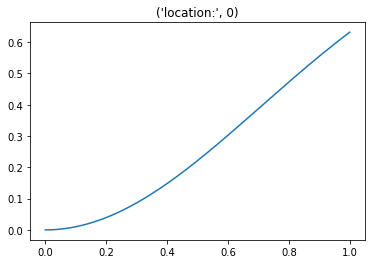

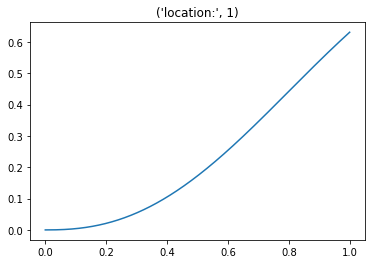

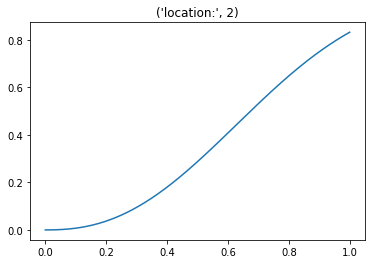

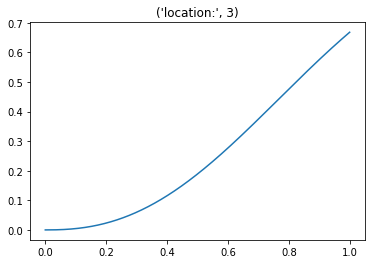

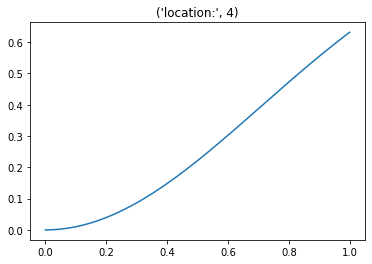

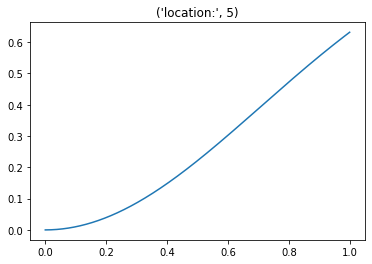

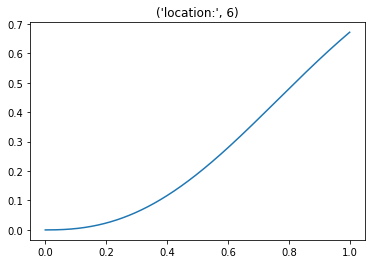

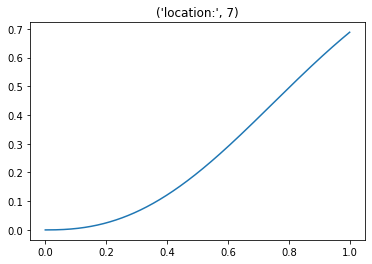

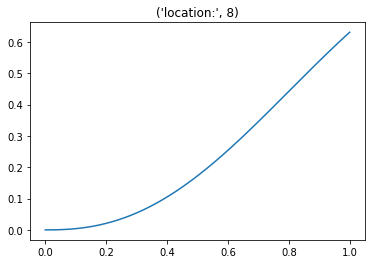

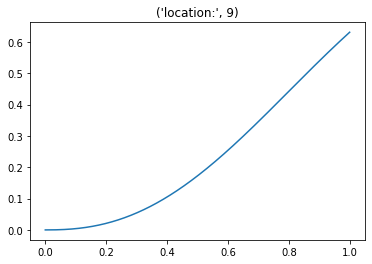

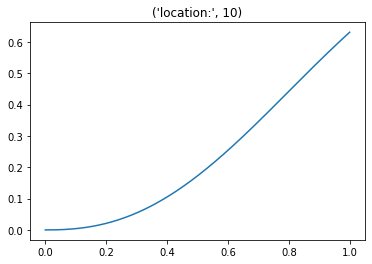

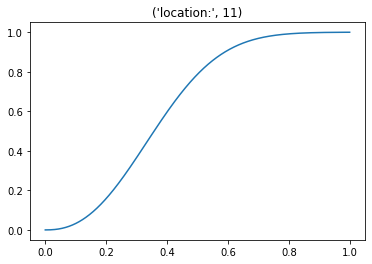

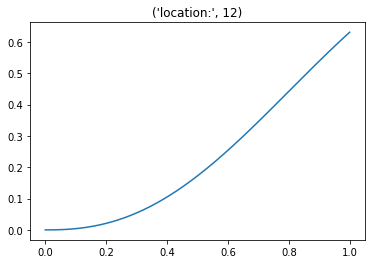

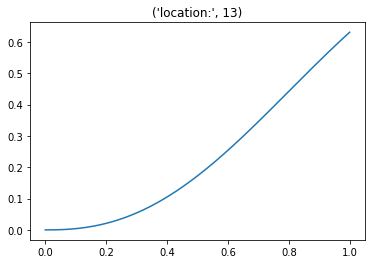

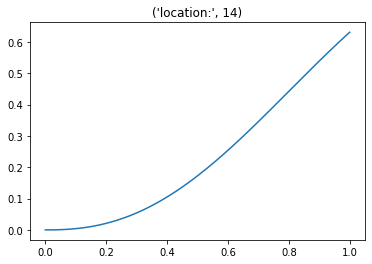

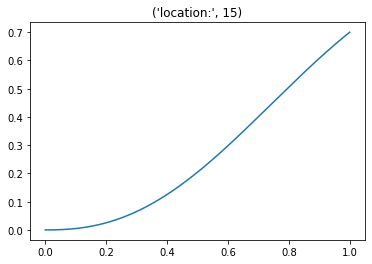

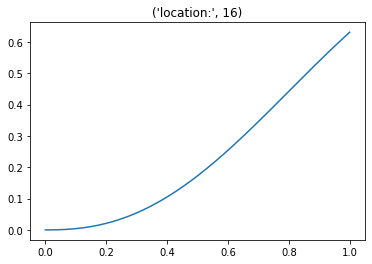

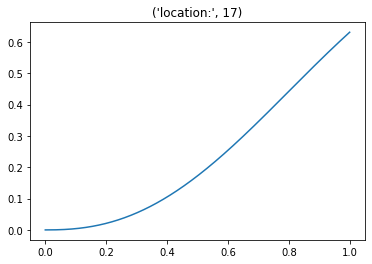

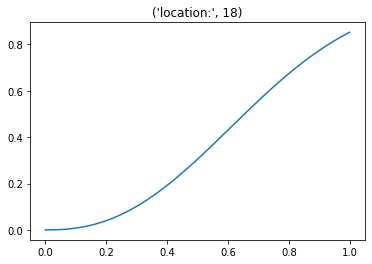

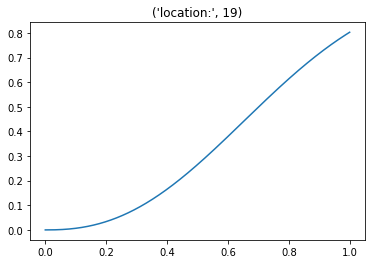

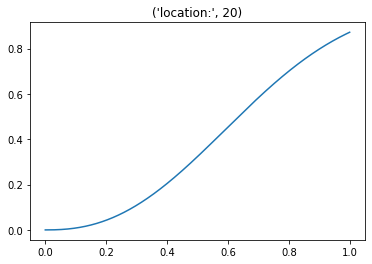

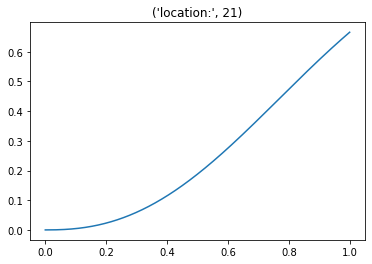

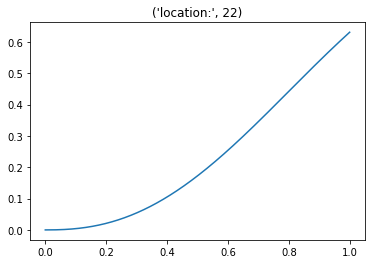

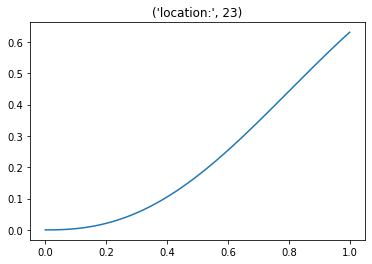

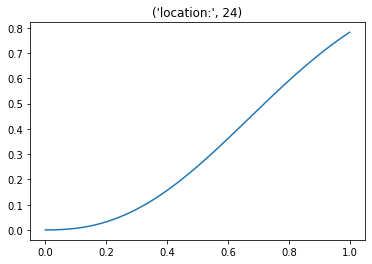

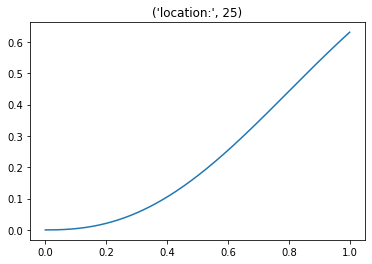

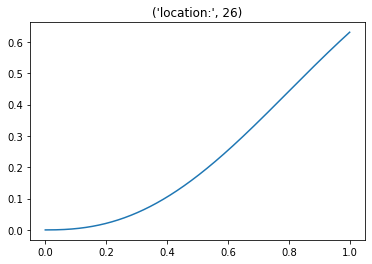

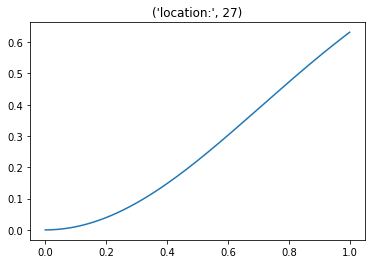

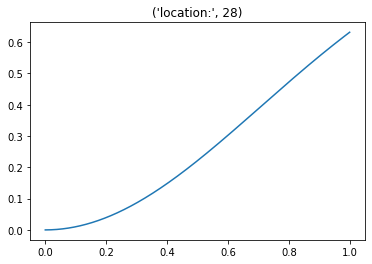

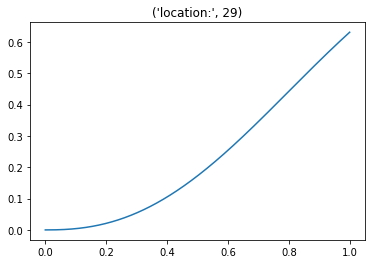

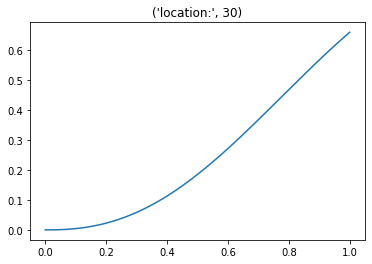

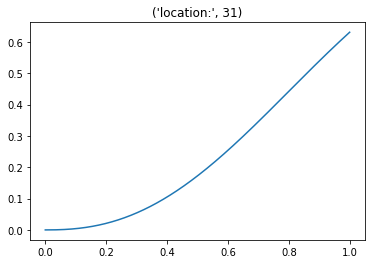

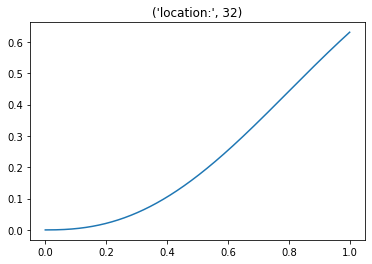

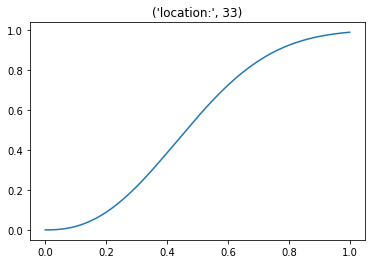

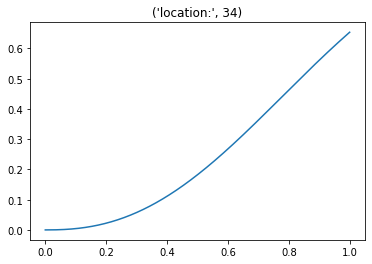

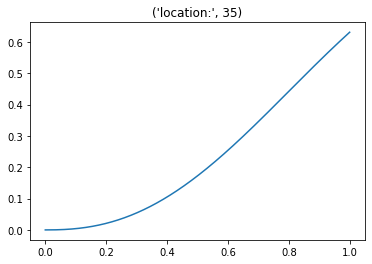

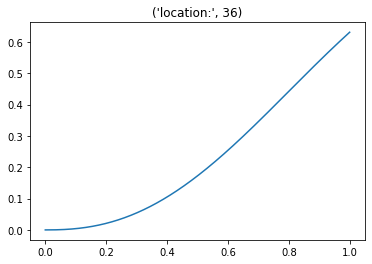

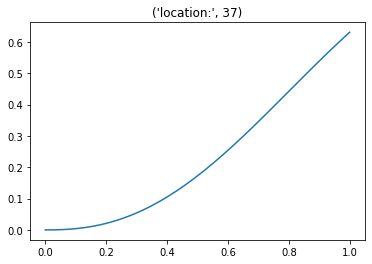

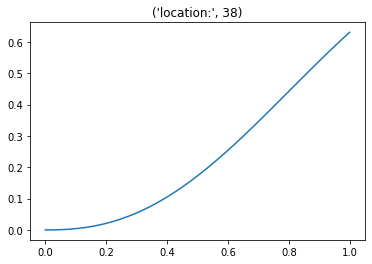

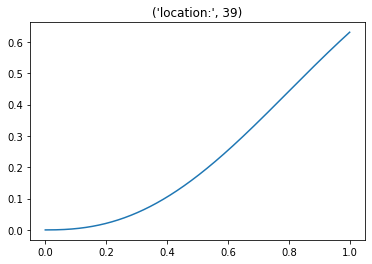

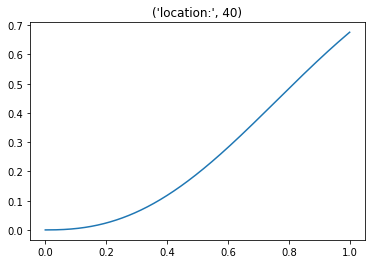

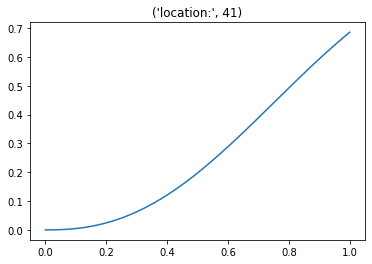

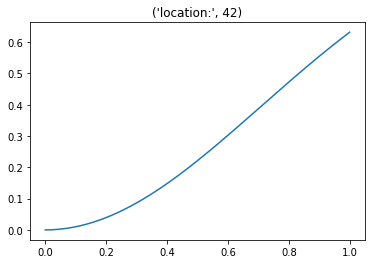

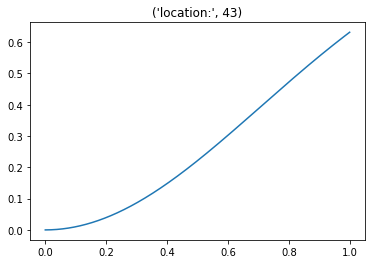

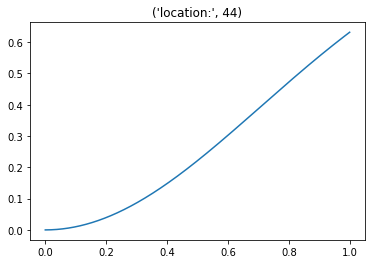

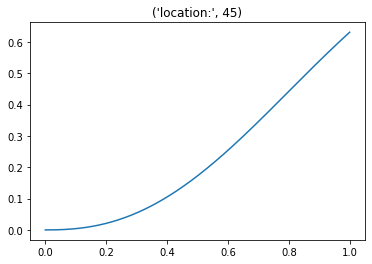

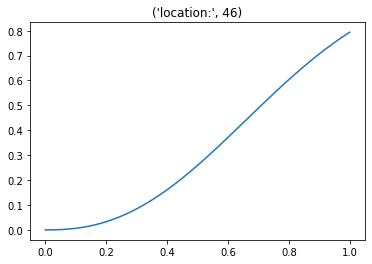

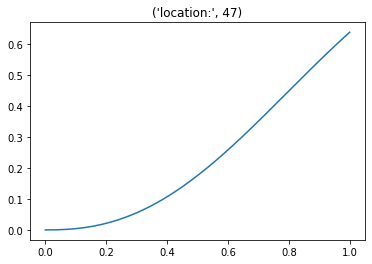

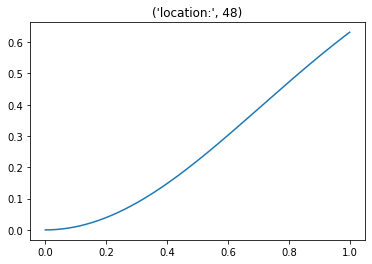

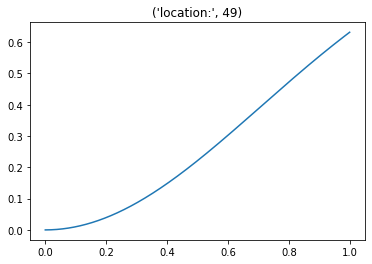

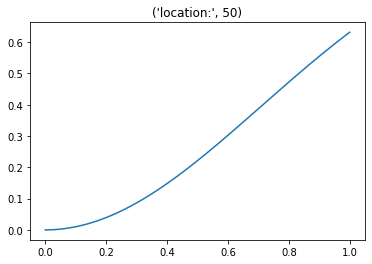

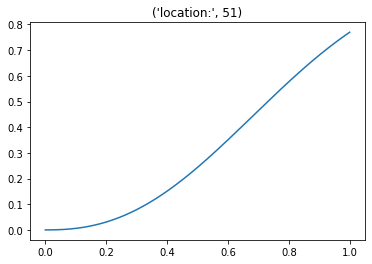

In [15]:
for i in range(len(responses_df)):
    plot_weibull(i)

In [16]:
simulation = False

SyntaxError: invalid syntax (<ipython-input-17-52f997fab065>, line 3)